In [1]:
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt

path="C:/Users/Miguel/Documents/UNIVERSIDAD/6_MASTER_BIOINFORMATICA/TFM/Repositorio/TFM"

# cargamos todos los datos del número de casos que hemos ido descartando con el análisis de calidad realizado 
resumen_qc=pd.read_csv(f"{path}/results/metadata_gsm/qc_resumen.csv")
print("Esta es la distribución de casos que no se han descartado tras el análisis de calidad")
# y vemos la tabla
HTML(resumen_qc.to_html(index=False))



Esta es la distribución de casos que no se han descartado tras el análisis de calidad


Inicial,QC metadatos,QC call rate
1215,878,878


In [2]:
print("Hemos descartado en cada paso los siguientes individuos:")
mapeo=resumen_qc["Inicial"]-resumen_qc["QC metadatos"]
call_rate=resumen_qc["QC metadatos"]-resumen_qc["QC call rate"]

tabla_diferencias = pd.DataFrame({
    "QC metadatos": mapeo,
    "QC call rate": call_rate
})

HTML(tabla_diferencias.to_html(index=False))

Hemos descartado en cada paso los siguientes individuos:


QC metadatos,QC call rate
337,0


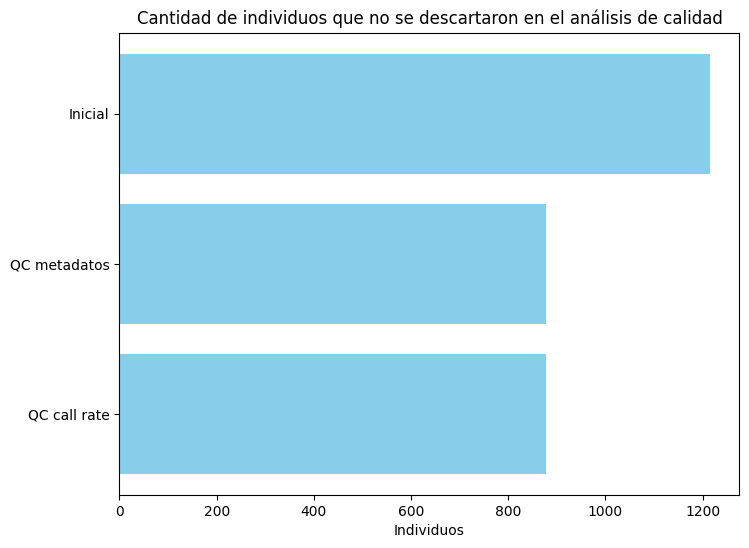

In [3]:
# y lo representamos:
qc_steps = resumen_qc.columns.tolist()  
individuos = resumen_qc.iloc[0].tolist()  
plt.figure(figsize=(8, 6))
plt.barh(qc_steps, individuos, color='skyblue')
plt.xlabel('Individuos')
plt.ylabel('')
plt.title('Cantidad de individuos que no se descartaron en el análisis de calidad')
plt.gca().invert_yaxis()  
plt.show()

In [13]:
# Ahora haremos una análisis del número de variantes que hemos perdido:
variantes_resumen=pd.read_csv(f"{path}/results/metadata_gsm/variantes_resumen.csv")
print("Este es el resumen de las variantes que tenemos en cada paso")
HTML(variantes_resumen.to_html(index=False))

Este es el resumen de las variantes que tenemos en cada paso


Inicial,Mapeo,Call-rate,Antes_imputar,"Imputado_0,3"
662841,661916,656744,641856,30304988


In [10]:
# Representamos la diferencia:
print("Hemos descartado en cada paso las siguientes variantes:")
mapeo=variantes_resumen["Inicial"]-variantes_resumen["Mapeo"]
call_rate=variantes_resumen["Mapeo"]-variantes_resumen["Call-rate"]
imputado_1=variantes_resumen["Call-rate"]-variantes_resumen["Antes_imputar"]
tabla_diferencias = pd.DataFrame({
    "Mapeo": mapeo,
    "Call-rate": call_rate,
    "Antes imputar": imputado_1,

})

HTML(tabla_diferencias.to_html(index=False))

Hemos descartado en cada paso las siguientes variantes:


Mapeo,Call-rate,Antes imputar
925,5172,14888


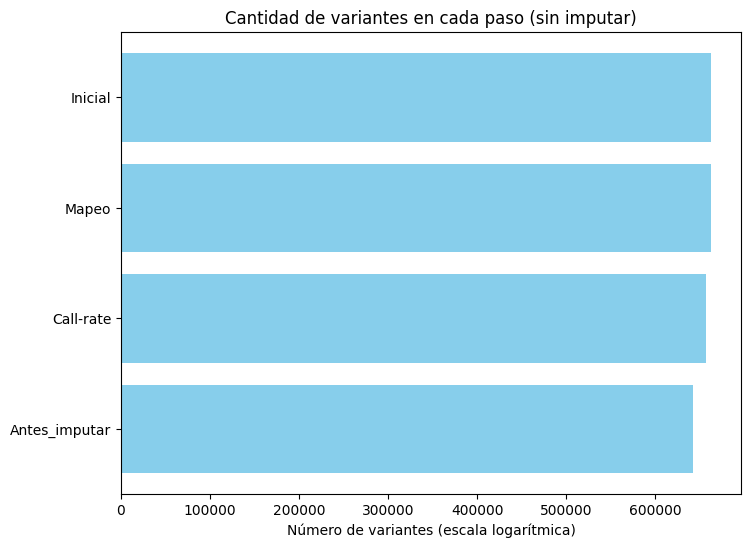

In [12]:
# y lo representamos:
columnas_excluir=['Imputado_0,3', 'Imputado_0,1']
SNPs_sin_imputado=variantes_resumen.loc[:, ~variantes_resumen.columns.isin(columnas_excluir)]

categorias = SNPs_sin_imputado.columns.tolist()  
variantes = SNPs_sin_imputado.iloc[0].tolist()  
plt.figure(figsize=(8, 6))
plt.barh(categorias, variantes, color='skyblue')
plt.xlabel('Número de variantes (escala logarítmica)')
plt.ylabel('')
plt.title('Cantidad de variantes en cada paso (sin imputar)')
plt.gca().invert_yaxis()  
plt.xscale('log')  
plt.show()

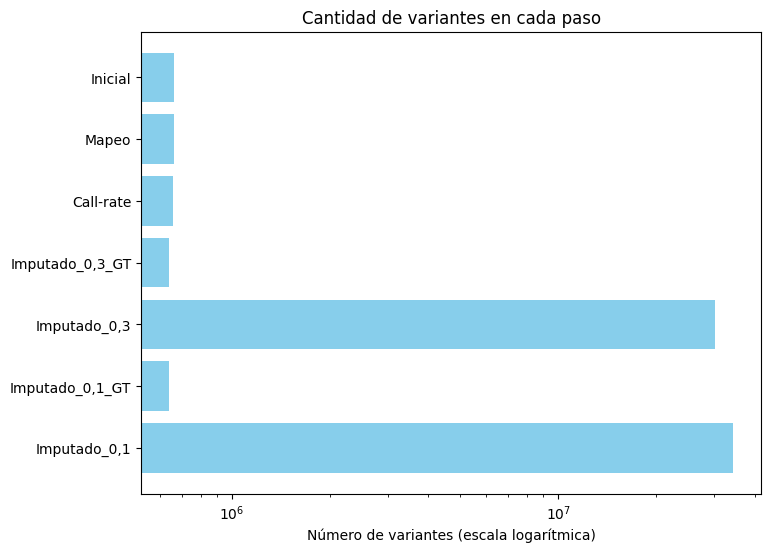

In [13]:
categorias2 = variantes_resumen.columns.tolist()  
variantes2 = variantes_resumen.iloc[0].tolist()  
plt.figure(figsize=(8, 6))
plt.barh(categorias2, variantes2, color='skyblue')
plt.xlabel('Número de variantes (escala logarítmica)')
plt.ylabel('')
plt.title('Cantidad de variantes en cada paso')
plt.gca().invert_yaxis()  
plt.xscale('log')  
plt.show()